In [1]:
# Dynohash
# a dynamic POW hash puzzle based on a maximum payload
# this is to maintain low tx fees but still allow complex data to be passed around
# the idea is that lets assume a tx max size of 1kb
# most txs are say 100 bytes
# if an attacker wants to spam the network, if its not 10x as hard to solve a 1kb payload, then they can do 
# much more damage.
# thus...
#
# take the original hashcash idea where H(PAYLOAD + nonce) = 0x000...abc, where the number of leading 0s
# fluctuates. this is the difficulty
# however, in a normal hash, which is usually 64 bytes, thats only 64 degrees of difficulty granularity
# we should smash it down into binary where each byte is 8 bits so that a 64 byte payload now has
# 512 degrees of granularity.
# let's just code it.

import hashlib

In [2]:
h = hashlib.sha256()

In [3]:
import secrets

In [5]:
secrets.token_bytes()

b'm\x97\xd3$Nj\x06\x9b\xa3\xdb\x8a\x0f!\xefD\xf5a1\xc4 f\xd9\x83D\xba\x7f(\x7f24\x04\x9e'

In [10]:
def byte_to_int(b):
    x = 0
    for bb in b:
        x = x * 256 + int(bb)
    return x

In [11]:
bin(byte_to_int(secrets.token_bytes()))

'0b111000101101011111000000010100001011000011011011000001000010101101101001001010110001110110001011110100100101011011111111110010011100000010011010000001001101000001111011100010011001101101100010100101111110100100010011101010000110111101111111010011000'

In [72]:
s = secrets.token_bytes()


while bin(byte_to_int(s))[3:][:5] != '00000':
    s = secrets.token_bytes()
    
print(s)
print(bin(byte_to_int(s)))

b'\x04\n\xe5Oj|h%/A\xd3\xcct\xb3\xe2\xfd\x8d\xa6\xd2\x08\xe4\x13\xe1\xd7/t\x8d\r\xcf[\xb5\xb0'
0b10000001010111001010100111101101010011111000110100000100101001011110100000111010011110011000111010010110011111000101111110110001101101001101101001000001000111001000001001111100001110101110010111101110100100011010000110111001111010110111011010110110000


In [97]:
def mini_dyno(difficulty=10):
    s = secrets.token_bytes()
    while bin(byte_to_int(s))[3:][:difficulty] != ''.join(['0' for x in range(difficulty)]):
        s = secrets.token_bytes()
    return s, bin(byte_to_int(s))[3:]
mini_dyno()

(b'@\x06\xdbA\xeak$\xc1\x9c\xbd\xf9\x1ai\x9a\xa1\xf3\xc3_*ZgB\x98\xc0\xf6\xf5\x16q>\xaaV\xa1',
 '00000000000110110110110100000111101010011010110010010011000001100111001011110111111001000110100110100110011010101000011111001111000011010111110010101001011010011001110100001010011000110000001111011011110101000101100111000100111110101010100101011010100001')

In [134]:
def mini_dyno_payload(payload, difficulty=19):
    # payload + nonce solves the puzzle. payload is a bytestring
    s = secrets.token_bytes()
    h = hashlib.sha256()
    h.update(payload + s)
    while bin(byte_to_int(h.digest()))[3:][:difficulty] != ''.join(['0' for x in range(difficulty)]):
        s = secrets.token_bytes()
        h = hashlib.sha256()
        h.update(payload + s)
    return s, bin(byte_to_int(h.digest()))[3:]

payload = secrets.token_bytes(256)

mini_dyno_payload(payload)

(b'\xa1A\xd7\xa4\x98\xde1I!\x9ar\xce\xd7\x7f\xd6\xee\xe6(\xf6\xb0\xe0\xd2f\xf3i-\rh\x14F\xb3\xac',
 '000000000000000000001111010111001100101001101101000011000011111110100101001000101110101011101111110010001100011000011000001111011110110000110100011011101110010110011000100110010000010101110011011011110100101011001110010110001001110000010010101000111101111')

In [ ]:
# the differences in time between 18 - 20 difficulty is ridiculous...
# what if we introduced a 'muddy proof' where the first X digits could only total up to a certain number?
# this could provide even more granularity
# first perhaps do time tests?

In [135]:
# TIME IT!
import time
current_milli_time = lambda: int(round(time.time() * 1000))

In [145]:
tt = []
for y in range(10):
    t = []
    for x in range(100):
        t_1 = current_milli_time()
        payload = secrets.token_bytes(256)
        mini_dyno_payload(payload, difficulty = y)
        t_2 = current_milli_time()
        t.append(t_2 - t_1)
    tt.append(t)

In [147]:
print(tt)

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [148]:
[sum(l) / float(len(l)) for l in tt]

[0.06, 0.09, 0.11, 0.17, 0.4, 0.64, 1.17, 2.03, 4.56, 8.87]

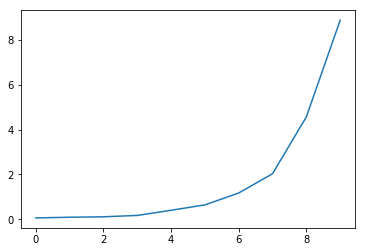

In [149]:
import matplotlib.pyplot as plt
plt.plot([sum(l) / float(len(l)) for l in tt])
plt.show()